## Nedir bu Confusion matrix?

Verisetinde 100 tane kedi, köpek olduğunu varsayalım:

- **TN**: 35 tane kediyi, kedi olarak (True) tahmin edilmiş.
- **FP**: 15 tane kediyi, köpek olarak (False) tahmin edilmiş.
- **FN**: 5 tane köpeği, kedi olarak (False) tahmin edilmiş.
- **TP**: 45 tane köpeği, köpek olarak (True) tahmin edilmiş.

Sonuç olarak 100 kedi ve köpek verisetinde 80 doğru tahmin, 20 yanlış tahmin yapılmış oldu.

**Confusion matrix** yukarıdaki bu tahmin oranlarını bize görsel olarak gösterir.

- Verisetinde target classlar unbalanced olarak dağılmış ise accuracy sonucu bizi yanıltabilir. Bu yüzden confision matrix bize ilaç gibi gelecektir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# 1- Read Data

In [2]:
data = pd.read_csv("data/dataset.csv")
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 2-Data Preprocessing

In [3]:
data.drop(["id","Unnamed: 32"], axis=1, inplace = True) # remove unnecessary columns


In [4]:
data.diagnosis = [ 1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x = data.drop(["diagnosis"], axis = 1) # axis=1, tüm sütundaki verileri siler.

In [5]:
y[15:25] # Yalnızca öÖrnek olsun diye herhangi bir aralık print edildi.

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [6]:
# normalization
x = (x - np.min(x))/(np.max(x)-np.min(x))
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# 3- Visualize Data

In [7]:
M = data[y == 1] # malignant = M  kotu huylu tumor
B = data[y == 0] # benign    = B  iyi huylu tumor

## NOTE:
figure'u çalıştırmadan önce taşmaları engellemek için, VSCODE'u laptopun ekranından, monitorun ekranına taşımayı unutma! :)

In [8]:
#constrained_layout = True: set the spacing between subplots
%matplotlib qt5
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, axs = plt.subplots(2, 3, constrained_layout = True,figsize=(18,9), dpi=96) # 2x3 plots and fixed figure size. PLEASE DONT CHANGE THE SIZE :)

fig.suptitle('Bazı Sütunların Karşılaştırması')

axs[0, 0].set_title("Radius Mean vs Texture Mean")
axs[0, 0].set_xlabel('radius_mean')
axs[0, 0].set_ylabel('texture_mean')
axs[0, 0].scatter(M.radius_mean, M.texture_mean, color="red", label="malignant", alpha= 0.3)
axs[0, 0].scatter(B.radius_mean, B.texture_mean, color="green", label="benign", alpha= 0.3)
axs[0, 0].legend(loc='lower right', frameon = True)     # legendlarin gorunurlugu(saydam gibi görünmemesi için)

axs[0, 1].set_title("Radius Mean vs Perimeter Mean")
axs[0, 1].set_xlabel('radius_mean')
axs[0, 1].set_ylabel('perimeter_mean')
axs[0, 1].scatter(M.radius_mean, M.perimeter_mean, color="red", label="malignant", alpha= 0.3)
axs[0, 1].scatter(B.radius_mean, B.perimeter_mean, color="green", label="benign", alpha= 0.3)
axs[0, 1].legend(loc='lower right', frameon = True)     # legendlarin gorunurlugu(saydam gibi görünmemesi için)

axs[0, 2].set_title("Radius Mean vs Area Mean")
axs[0, 2].set_xlabel('radius_mean')
axs[0, 2].set_ylabel('area_mean')
axs[0, 2].scatter(M.radius_mean, M.area_mean, color="red", label="malignant", alpha= 0.3)
axs[0, 2].scatter(B.radius_mean, B.area_mean, color="green", label="benign", alpha= 0.3)
axs[0, 2].legend(loc='lower right', frameon = True)     # legendlarin gorunurlugu(saydam gibi görünmemesi için)

axs[1, 0].set_title("Radius Mean vs Smoothness Mean")
axs[1, 0].set_xlabel('radius_mean')
axs[1, 0].set_ylabel('smoothness_mean')
axs[1, 0].scatter(M.radius_mean, M.smoothness_mean, color="red", label="malignant", alpha= 0.3)
axs[1, 0].scatter(B.radius_mean, B.smoothness_mean, color="green", label="benign", alpha= 0.3)
axs[1, 0].legend(loc='lower right', frameon = True)     # legendlarin gorunurlugu(saydam gibi görünmemesi için)

axs[1, 1].set_title("Radius Mean vs Compactness Mean")
axs[1, 1].set_xlabel('radius_mean')
axs[1, 1].set_ylabel('compactness_mean')
axs[1, 1].scatter(M.radius_mean, M.compactness_mean, color="red", label="malignant", alpha= 0.3)
axs[1, 1].scatter(B.radius_mean, B.compactness_mean, color="green", label="benign", alpha= 0.3)
axs[1, 1].legend(loc='lower right', frameon = True)     # legendlarin gorunurlugu(saydam gibi görünmemesi için)

axs[1, 2].set_title("Radius Mean vs Concavity Mean")
axs[1, 2].set_xlabel('radius_mean')
axs[1, 2].set_ylabel('concavity_mean')
axs[1, 2].scatter(M.radius_mean, M.concavity_mean, color="red", label="malignant", alpha= 0.3)
axs[1, 2].scatter(B.radius_mean, B.concavity_mean, color="black", label="benign", alpha= 0.3)
axs[1, 2].legend(loc='lower right', frameon = True)     # legendlarin gorunurlugu(saydam gibi görünmemesi için)

plt.savefig("sample_fig.png") # isteğe bağlı kaydedilebilir.
plt.show()

# 4-Split Data

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

# 5-Create Model (DT and Random Forest)

### Note
Aşağıda karşılaştırmak amacıyla DT ve RF algoritmaları oluşturulmuştur.
Yalnızca RF oluşturulursa da yeterli olacaktır! :)


### Note2
**random_state = 42** => Program her çalıştırılışta, her sefer, aynı random verileri seçsin. 42 yerine herhangi bir sayı da olabilir, **42** sayısı bir kimlik belirtir. Niçin **42**?**Otostopçunun Galaksi Rehberi** kitabındaki her şeyin anlamı olan **42** sayısından esinlenilmiş! :)

In [10]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Better Model

rf = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

### NOTE 
İdeal minimumum **estimator** sayısını, **deneye deneye** (sonucu etkisi az olana kadar), bulmayı unutmuyoruz! :) 

# 6-Test(Predict) Data with Decision Tree

#### Note

Aşağıdaki sonucun yorumu:

- Okunan x_test içerisindeki 86 sample'ın % 93'ünü, yani 80 tanesini  doğru tahmin etti. 
 
- 86 sample'ın % 7'sini yani yaklaşık 6 tanesini ise yanlış tahmin etti.

In [11]:
print("Decision Tree Accuracy: ", dt.score(x_test, y_test)) 

Decision Tree Accuracy:  0.9186046511627907


# 7-Test Data with Random Forest (100 DT)

In [12]:
print("Random Forest Accuracy: ", rf.score(x_test, y_test))

Random Forest Accuracy:  0.9534883720930233


# 8-Create Confusion Matrix

In [13]:
y_pred = rf.predict(x_test)
y_true = y_test
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [14]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[53,  1],
       [ 3, 29]], dtype=int64)

# 9-Visualize Confusion Matrix

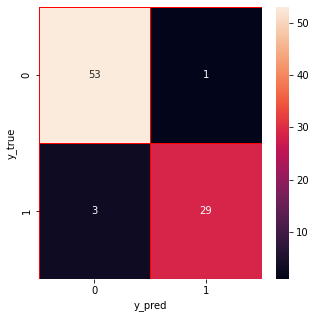

In [15]:
%matplotlib inline
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

İyi huylu = 0

Kötü huylu = 1 olarak tanımlamıştık. Confusion Matrixe göre,

- **54** tane iyi huylu (**0**) gerçek(true) datam varmış, bunların:
- **53** tanesini doğru, 
- **1** tanesini yanlış (**1**) tahmin etmişim.
  
**32** tane kötü huylu(**1**) gerçek(true) datam varmış, bunların: 
- **29** tanesini doğru (**1**), 
- **3** tanesini yanlış (**0**) tahmin etmişim.